# 승촌보(용봉) 데이터

- 영산강 승촌보(용봉) 데이터 살펴 보기
- 연도별 클로로필 a 변화 확인

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import platform
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정
if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)

# 데이터 가져오기

In [4]:
base_path = '/content/drive/MyDrive/water_data/'

## 승촌보 자료를 데이터프레임으로 만들기   


* `skiprows=0`: 0번 행 무시. 모든 워크시트 대상.
* `header=1`: 1번 행을 header로 지정, 즉 열 인덱스로 사용.
* `sheet_name=None`: 모든 워크시트 가져오기. 워크시트별로 하나의 df 생성. 반환값은 사전.
* `na_values='ND'`: ND(No Data/Not Determinded) 또한 결측치로 처리. 용조산소 열에 포함되어 있음.
* `index_col=0`: 측정일을 행 인덱스로 사용
* `parse_dates=True`: 행 인덱스로 사용되는 날짜 대상 파싱 실행

In [5]:
scb_yearly = pd.read_excel(base_path+"Seungchonbo.xlsx", 
                            skiprows=0, 
                            header=1, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col = 0을 제외함

In [6]:
print(type(scb_yearly))  # type-dict
print(scb_yearly.keys())  # 2012년부터 2022년까지

<class 'dict'>
dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])


## 연도별 기본정보 확인 - info, describe

In [7]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m')
    print(scb_yearly[year].info())
    print('='*50)

 2012년 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정일/월        4343 non-null   object 
 1   측정소명         4343 non-null   object 
 2   수온 ℃         2218 non-null   float64
 3   수소이온농도       2218 non-null   float64
 4   전기전도도 μS/cm  2216 non-null   float64
 5   용존산소 mg/L    2218 non-null   float64
 6   총유기탄소 mg/L   2122 non-null   float64
 7   총질소 mg/L     0 non-null      float64
 8   총인 mg/L      0 non-null      float64
 9   클로로필-a mg/㎥  2270 non-null   float64
dtypes: float64(8), object(2)
memory usage: 339.4+ KB
None
 2013년 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   측정일/월        8750 non-null   object 
 1   측정소명         8750 non-null   object 
 2   수온 ℃         8052 non-null   float

In [11]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m')
    print(scb_yearly[year].describe())
    print('='*50)

 2012년 
              수온 ℃       수소이온농도  전기전도도 μS/cm    용존산소 mg/L   총유기탄소 mg/L  \
count  2218.000000  2218.000000  2216.000000  2218.000000  2122.000000   
mean     13.862669     7.025789   287.684567     8.371100     2.880443   
std       6.405126     0.438518    56.154883     2.438562     0.559138   
min       2.400000     6.300000   129.000000     1.700000     1.400000   
25%       8.200000     6.700000   242.750000     6.600000     2.500000   
50%      14.100000     6.900000   301.000000     8.200000     2.800000   
75%      19.500000     7.200000   328.000000    10.300000     3.200000   
max      26.400000     9.400000   416.000000    14.800000     5.200000   

       총질소 mg/L  총인 mg/L  클로로필-a mg/㎥  
count       0.0      0.0  2270.000000  
mean        NaN      NaN    25.953304  
std         NaN      NaN    24.910793  
min         NaN      NaN     1.400000  
25%         NaN      NaN     9.900000  
50%         NaN      NaN    12.600000  
75%         NaN      NaN    44.700000  
max  

### 송촌보 자료의 결측치 확인

# 모든 변수에서 결측치가 없는 데이터로 데이터프레임 만들기

* 데이터프레임명 : scb_yearly_w_all

In [8]:
scb_yearly_w_all = {}

for year in scb_yearly:
    scb_yearly_w_all[year] = scb_yearly[year].copy().dropna()

In [9]:
print(type(scb_yearly_w_all))
print(scb_yearly_w_all.keys())

<class 'dict'>
dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])


scb_yearly_w_all의 각 연도별 데이터의 수

In [10]:
for year in scb_yearly_w_all:
    print('\033[43m', year,'\033[0m', end = ' ')
    print(len(scb_yearly_w_all[year]))

 2012년  0
 2013년  5333
 2014년  5298
 2015년  7289
 2016년  7154
 2017년  6096
 2018년  1427
 2019년  4007
 2020년  4350
 2021년  5925
 2022년  2254


#### 연도별 데이터 수(결측치 포함)

* 2012년은 9월 20일 데이터부터 있고, 그 이후에도 결측치 있음.
* 2022년은 5월 23일 데이터까지 있음.

In [58]:
for year in scb_yearly:
    print(year, ':', len(scb_yearly[year]))

2012년 : 4343
2013년 : 8750
2014년 : 8760
2015년 : 8739
2016년 : 8784
2017년 : 8730
2018년 : 8758
2019년 : 8760
2020년 : 8784
2021년 : 8760
2022년 : 3432


#### 연도별 변수별 결측치 개수 확인

In [60]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m', '(개수)')
    print(scb_yearly[year].notnull().sum())
    print('='*50)

 2012년  (개수)
측정일/월          4343
측정소명           4343
수온 ℃           2218
수소이온농도         2218
전기전도도 μS/cm    2216
용존산소 mg/L      2218
총유기탄소 mg/L     2122
총질소 mg/L          0
총인 mg/L           0
클로로필-a mg/㎥    2270
dtype: int64
 2013년  (개수)
측정일/월          8750
측정소명           8750
수온 ℃           8052
수소이온농도         8052
전기전도도 μS/cm    8050
용존산소 mg/L      7935
총유기탄소 mg/L     8042
총질소 mg/L       5993
총인 mg/L        6048
클로로필-a mg/㎥    7109
연월일            8750
월일             8750
dtype: int64
 2014년  (개수)
측정일/월          8760
측정소명           8760
수온 ℃           8264
수소이온농도         8264
전기전도도 μS/cm    8247
용존산소 mg/L      8179
총유기탄소 mg/L     5826
총질소 mg/L       8158
총인 mg/L        8197
클로로필-a mg/㎥    8142
연월일            8760
월일             8760
dtype: int64
 2015년  (개수)
측정일/월          8739
측정소명           8739
수온 ℃           8378
수소이온농도         8381
전기전도도 μS/cm    8377
용존산소 mg/L      8107
총유기탄소 mg/L     7968
총질소 mg/L       8223
총인 mg/L        8124
클로로필-a mg/㎥    8416
연월일            8739
월일       

#### 연도별 변수별 결측치 비율 확인

* <font color='blue'>2012년</font>은 총질소와 총인의 데이터가 전혀 없음. → <font color='red'>두 항목 없이 분석하던가 2012년을 분석에서 제외</font>
* <font color='blue'>2018년</font>은 데이터도 20% 내외의 데이터만 있음.
* <font color='blue'>2019년</font>은 50~60% 정도의 데이터가 있음.

In [61]:
for year in scb_yearly:
    print('\033[43m', year,'\033[0m', '(%)')
    print(scb_yearly[year].notnull().sum() * 100/len(scb_yearly[year]))
    print('='*50)

 2012년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            51.070688
수소이온농도          51.070688
전기전도도 μS/cm     51.024637
용존산소 mg/L       51.070688
총유기탄소 mg/L      48.860235
총질소 mg/L         0.000000
총인 mg/L          0.000000
클로로필-a mg/㎥     52.268017
dtype: float64
 2013년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            92.022857
수소이온농도          92.022857
전기전도도 μS/cm     92.000000
용존산소 mg/L       90.685714
총유기탄소 mg/L      91.908571
총질소 mg/L        68.491429
총인 mg/L         69.120000
클로로필-a mg/㎥     81.245714
연월일            100.000000
월일             100.000000
dtype: float64
 2014년  (%)
측정일/월          100.000000
측정소명           100.000000
수온 ℃            94.337900
수소이온농도          94.337900
전기전도도 μS/cm     94.143836
용존산소 mg/L       93.367580
총유기탄소 mg/L      66.506849
총질소 mg/L        93.127854
총인 mg/L         93.573059
클로로필-a mg/㎥     92.945205
연월일            100.000000
월일             100.000000
dtype: float64
 2015년  (%)
측정일/월          100.0000

#### 연도별 클로로필 데이터의 수

* 2018년도 데이터의 수가 적다




In [62]:
lst_scb_yearly_w_chlo = []

for year in scb_yearly:
    print(year, ':', sum(scb_yearly[year]['클로로필-a mg/㎥'].notnull()))
    lst_scb_yearly_w_chlo.append(sum(scb_yearly[year]['클로로필-a mg/㎥'].notnull()))

2012년 : 2270
2013년 : 7109
2014년 : 8142
2015년 : 8416
2016년 : 8186
2017년 : 7185
2018년 : 2038
2019년 : 5243
2020년 : 5854
2021년 : 7441
2022년 : 3262


# 클로로필 변화

## 전체 선그래프 - 시간 기준

In [19]:
x, y = [], []

for year in list(scb_yearly_w_all.keys())[1:]:
    x += list(scb_yearly_w_all[year]['측정일/월'])
    y += list(scb_yearly_w_all[year]['클로로필-a mg/㎥']) 

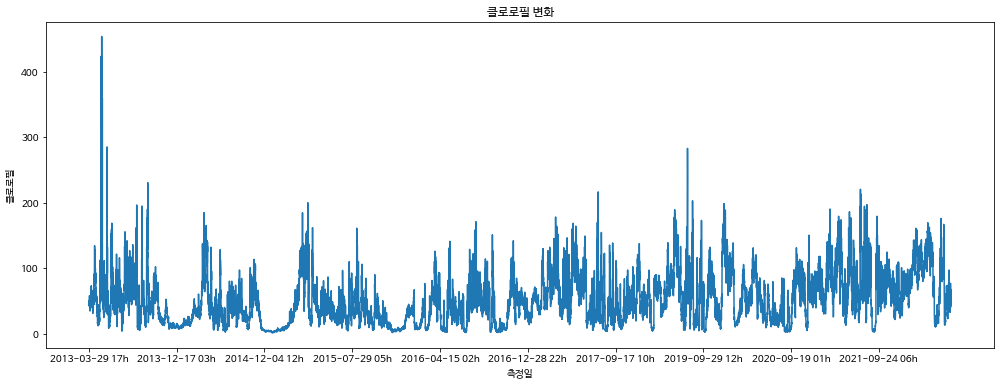

In [20]:
fig = plt.figure(figsize=(17, 6))

plt.plot(x, y)
plt.xticks(x[::5000])

plt.title('클로로필 변화')
plt.xlabel('측정일')
plt.ylabel('클로로필')

plt.show()

In [21]:
print(f'{x[y.index(max(y))]}에 클로로필 수치가 {max(y)}로 가장 높음')

2013-05-07 14h에 클로로필 수치가 453.5로 가장 높음


**<font color="red">2013년 5월 7일 14시에 클로로필 수치가 453.5로 가장 높음</font>**

* 2013년 5월 7일 12시 클로로필 159.7
* 2013년 5월 7일 13시 클로로필 190
* 2013년 5월 7일 14시 클로로필 453.5
* 2013년 5월 7일 15시, 16시, 17시 클로로필 결측
* 2013년 5월 7일 18시 클로로필 227 

2013년 5월 7일 14시 자료는 <font color="blue">이상치</font>로 판단됨. 

* 2013년을 제외하고 클로로필 수치가 400을 넘어가는 일은 없었음

2013년 5월 7일 10시부터 18시사이 클로로필 수치는?

In [54]:
scb_yearly_w_all['2013년'][725:730]
#scb_yearly_w_all['2013년'][scb_yearly_w_all['2013년']['클로로필-a mg/㎥'].max() == scb_yearly_w_all['2013년']['클로로필-a mg/㎥']] #3037

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3035,2013-05-07 12h,용봉,21.0,7.8,353.0,13.7,5.5,3.729,0.177,159.7
3036,2013-05-07 13h,용봉,22.0,8.1,348.0,14.5,5.5,3.754,0.183,190.0
3037,2013-05-07 14h,용봉,22.9,8.5,340.0,16.2,5.6,3.723,0.188,453.5
3042,2013-05-07 19h,용봉,21.6,9.0,340.0,18.6,5.8,3.695,0.202,227.8
3043,2013-05-07 20h,용봉,20.9,8.6,345.0,15.6,6.0,3.259,0.202,212.2


클로로필 차(다음 시간대의 클로로필 - 이전 시간대의 클로로필)를 구해 너무 차이가 심하면, 예를 들어 100 이상이면 이상치로 판단할까?..   
그런데, 아래아래처럼, scb_yearly['2013년'][3008:3020]를 확인하면 다음과 같은 경우도 있음.    
123.3 →  NaN → 236.5 → 409.7 → 423.5 → 384.9 → 236.9 → 175.2 → 169.8 → 167.1 → 151.6  

즉, 차이가 심하지 않는 부분도 이상치로 봐야 할 부분들이 있음.

In [23]:
scb_yearly['2013년'][3034:3050]

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3034,2013-05-07 11h,용봉,20.9,7.5,355.0,12.2,5.5,3.643,0.174,68.4
3035,2013-05-07 12h,용봉,21.0,7.8,353.0,13.7,5.5,3.729,0.177,159.7
3036,2013-05-07 13h,용봉,22.0,8.1,348.0,14.5,5.5,3.754,0.183,190.0
3037,2013-05-07 14h,용봉,22.9,8.5,340.0,16.2,5.6,3.723,0.188,453.5
3038,2013-05-07 15h,용봉,23.5,9.1,335.0,19.9,5.5,3.725,0.192,NaN
3039,2013-05-07 16h,용봉,23.0,9.1,337.0,19.6,5.5,3.725,0.197,NaN
3040,2013-05-07 17h,용봉,NaN,NaN,NaN,NaN,NaN,NaN,0.202,NaN
3041,2013-05-07 18h,용봉,22.1,9.0,341.0,19.1,5.8,NaN,NaN,275.0
3042,2013-05-07 19h,용봉,21.6,9.0,340.0,18.6,5.8,3.695,0.202,227.8
3043,2013-05-07 20h,용봉,20.9,8.6,345.0,15.6,6.0,3.259,0.202,212.2


<font size="red"> </font>

In [ ]:
scb_yearly['2013년'][3008:3020]

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
3008,2013-05-06 09h,용봉,19.4,7.1,350.0,11.5,5.2,4.285,0.145,70.3
3009,2013-05-06 10h,용봉,19.7,7.3,353.0,13.6,5.2,4.288,0.147,123.3
3010,2013-05-06 11h,용봉,NaN,NaN,NaN,NaN,NaN,4.298,0.148,NaN
3011,2013-05-06 12h,용봉,20.8,8.1,343.0,15.9,4.9,4.516,0.151,236.5
3012,2013-05-06 13h,용봉,21.2,8.3,343.0,16.0,5.0,4.624,0.155,409.7
3013,2013-05-06 14h,용봉,21.7,8.5,341.0,16.5,4.9,4.747,0.158,423.5
3014,2013-05-06 15h,용봉,21.6,8.5,340.0,16.6,5.0,4.838,0.158,384.9
3015,2013-05-06 16h,용봉,20.9,8.4,340.0,15.7,5.1,4.794,0.154,236.9
3016,2013-05-06 17h,용봉,20.5,8.2,343.0,14.2,5.0,4.681,0.154,175.2
3017,2013-05-06 18h,용봉,20.3,8.1,344.0,14.1,5.0,4.635,0.153,169.8


## 연도별 막대그래프 - 하루 기준

In [11]:
for year in list(scb_yearly.keys())[1:]:
    scb_yearly[year]['연월일'] = 0
    scb_yearly[year]['월일'] = 0
    scb_yearly[year]['연월일'] = scb_yearly[year]['측정일/월'].apply(lambda x : x[:-4])
    scb_yearly[year]['월일'] = scb_yearly[year]['측정일/월'].apply(lambda x : x[5:-4])

In [12]:
scb_yearly_groupby_day = {}

scb_yearly_groupby_day['2013년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2013-01-01', '2013-12-31').astype('str')))
scb_yearly_groupby_day['2014년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2014-01-01', '2014-12-31').astype('str')))
scb_yearly_groupby_day['2015년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2015-01-01', '2015-12-31').astype('str')))
scb_yearly_groupby_day['2016년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2016-01-01', '2016-12-31').astype('str')))
scb_yearly_groupby_day['2017년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2017-01-01', '2017-12-31').astype('str')))
scb_yearly_groupby_day['2018년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2018-01-01', '2018-12-31').astype('str')))
scb_yearly_groupby_day['2019년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2019-01-01', '2019-12-31').astype('str')))
scb_yearly_groupby_day['2020년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2020-01-01', '2020-12-31').astype('str')))
scb_yearly_groupby_day['2021년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2021-01-01', '2021-12-31').astype('str')))
scb_yearly_groupby_day['2022년'] = pd.DataFrame(pd.Series(0.0, index = pd.date_range('2022-01-01', '2022-12-31').astype('str')))

In [13]:
for year in scb_yearly_groupby_day:
    scb_yearly_groupby_day[year]['수온 ℃'] = 0.0
    scb_yearly_groupby_day[year]['수소이온농도'] = 0.0
    scb_yearly_groupby_day[year]['전기전도도 μS/cm'] = 0.0
    scb_yearly_groupby_day[year]['용존산소 mg/L'] = 0.0
    scb_yearly_groupby_day[year]['총유기탄소 mg/L'] = 0.0
    scb_yearly_groupby_day[year]['총질소 mg/L'] = 0.0
    scb_yearly_groupby_day[year]['총인 mg/L'] = 0.0
    scb_yearly_groupby_day[year]['클로로필-a mg/㎥'] = 0.0

In [14]:
for year in scb_yearly_groupby_day:
    for i in scb_yearly_groupby_day[year].index:
        try:
            for col in scb_yearly[year].columns[2:-2]:
                scb_yearly_groupby_day[year][col][i] =  scb_yearly[year].groupby('연월일')[col].mean()[i]
        except:
            continue

**그래프의 x축을 일정하게 하기 위해 자료가 없다면 NAN이 되도록 함**

In [15]:
for year in scb_yearly_groupby_day:
    del scb_yearly_groupby_day[year][0]

In [122]:
scb_yearly_groupby_day['2014년']

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
2014-01-01,6.108333,6.700000,418.750000,8.083333,3.591667,6.491375,0.058708,11.466667
2014-01-02,6.365217,6.700000,411.347826,8.726087,3.673913,6.271583,0.055708,13.626087
2014-01-03,6.513043,6.704348,393.913043,9.482609,3.808696,6.017652,0.052409,16.721739
2014-01-04,5.987500,6.775000,373.500000,10.929167,4.108333,5.532125,0.052375,21.229167
2014-01-05,6.333333,6.754167,400.250000,10.050000,4.125000,5.973583,0.059167,22.150000
...,...,...,...,...,...,...,...,...
2014-12-27,6.125000,7.000000,459.875000,9.812500,2.579167,3.227417,0.069125,2.516667
2014-12-28,6.091667,7.000000,442.625000,9.570833,2.525000,3.582708,0.059833,2.883333
2014-12-29,6.379167,7.000000,428.541667,9.612500,2.625000,3.925542,0.060227,3.200000
2014-12-30,6.413636,6.963636,409.318182,9.454545,2.950000,4.525455,0.063545,3.722727


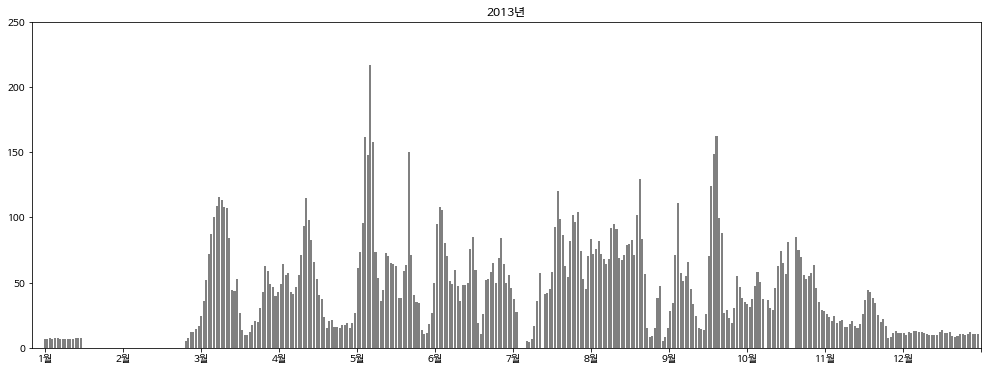

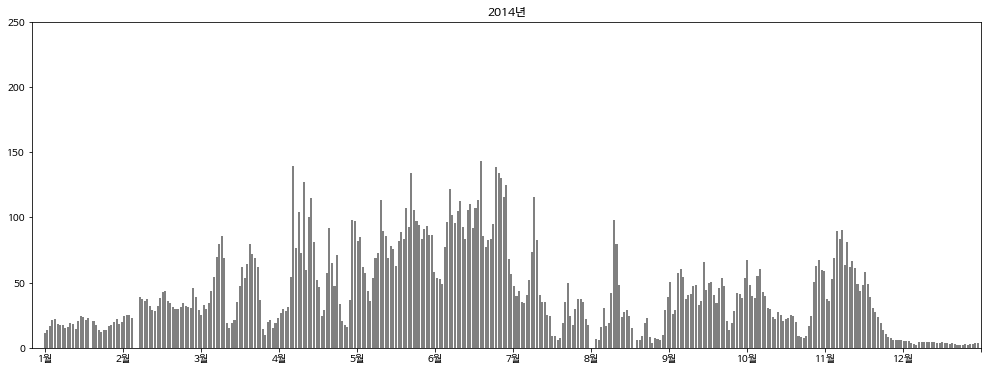

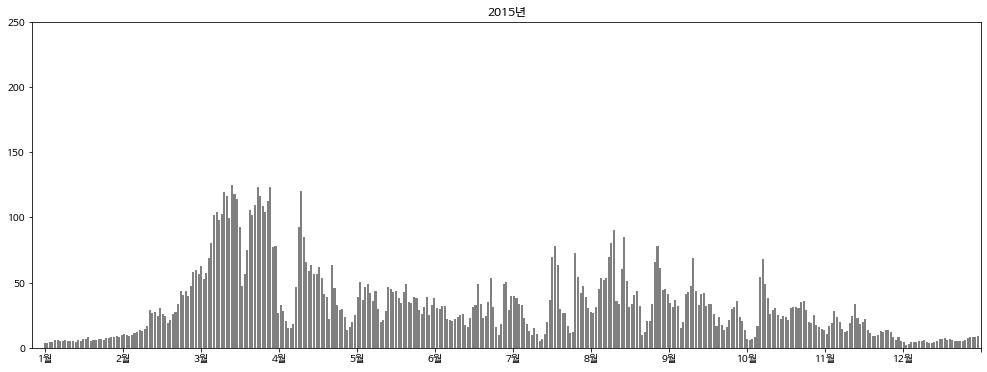

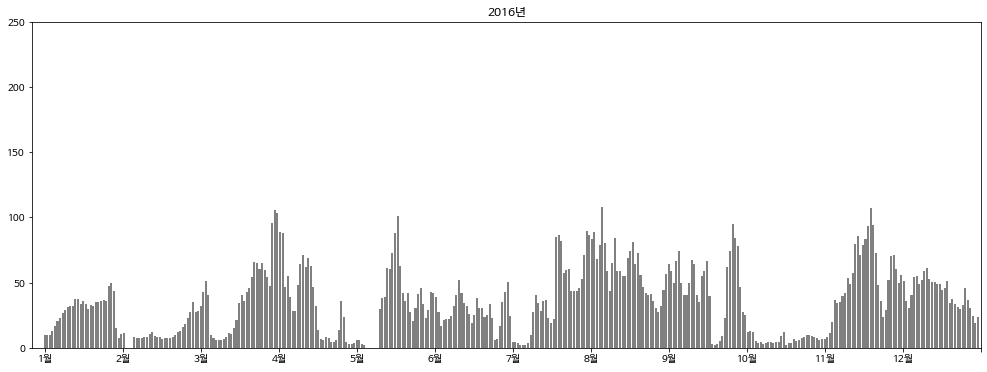

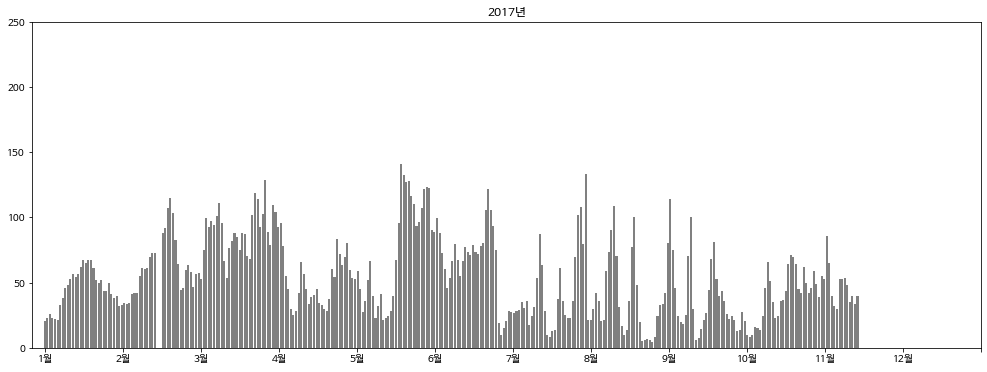

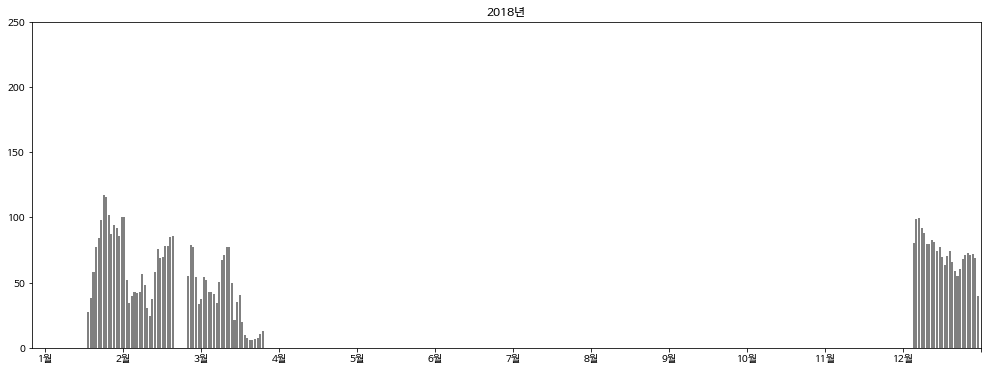

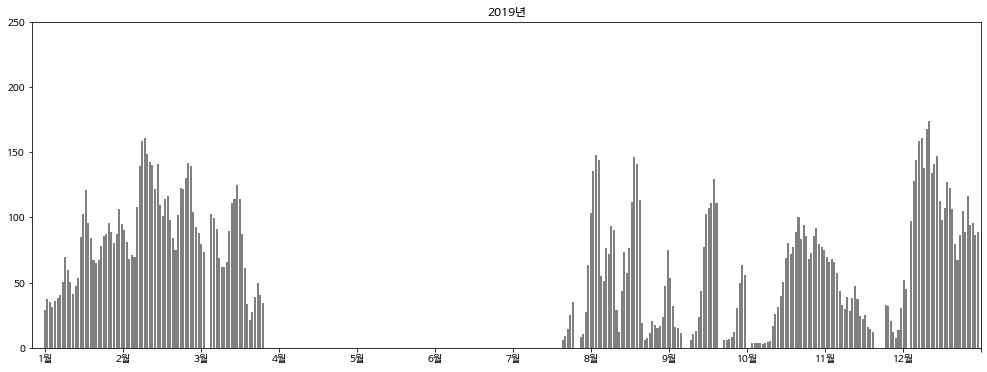

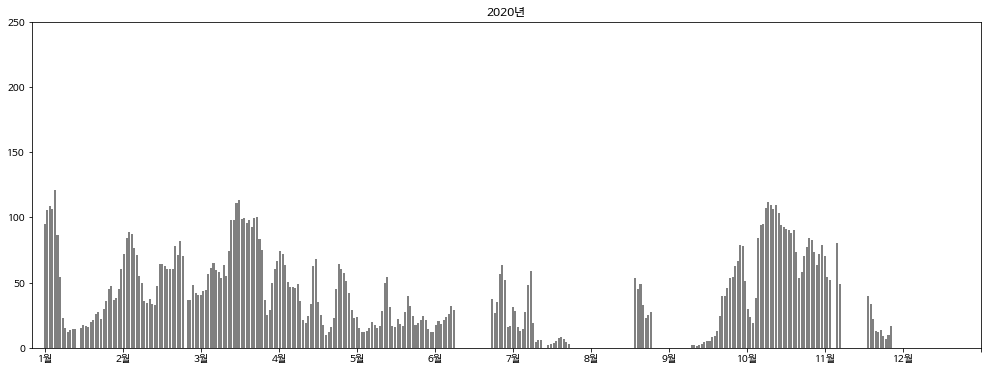

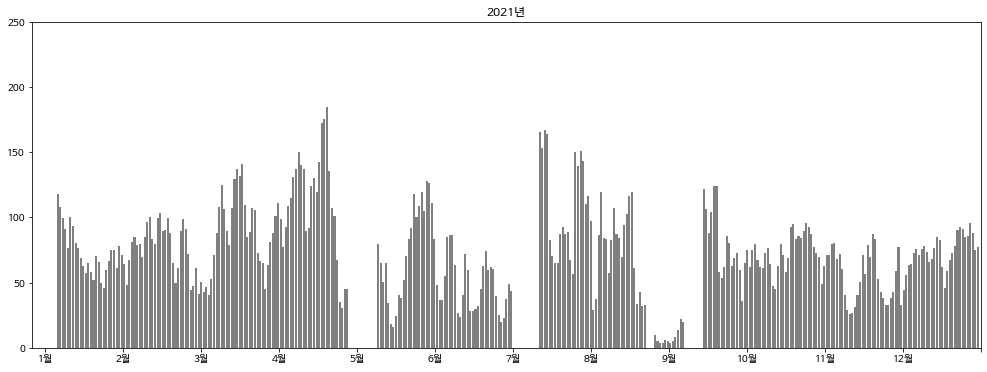

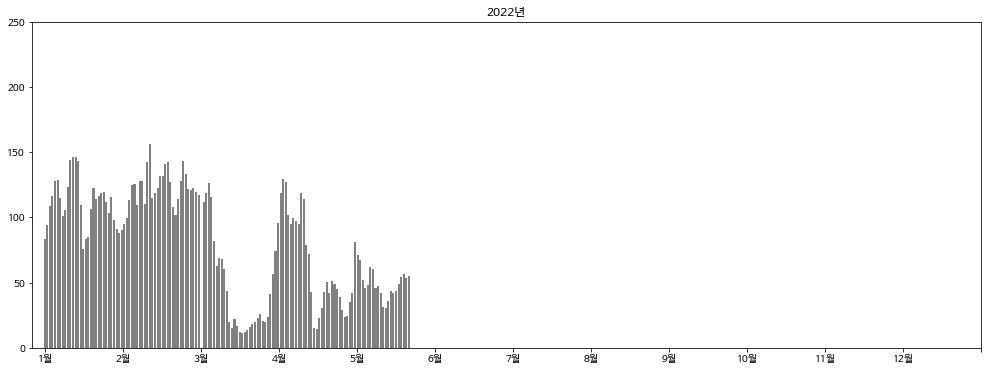

In [125]:
month = [str(i)+'월' for i in range(1, 13)]

for year in scb_yearly_groupby_day:
    fig = plt.figure(figsize=(17,6))
    plt.title(str(year))
    plt.axis([-5, 365, 0, 250])
    plt.bar(scb_yearly_groupby_day[year].index, scb_yearly_groupby_day[year]['클로로필-a mg/㎥'], color = 'gray')
    if year in ['2016년', '2020년']:
        plt.xticks(np.linspace(0,366,13), month)
    else:
        plt.xticks(np.linspace(0,365,13), month)
    plt.show()

# 랜덤포레스트(회귀)

In [126]:
from sklearn.ensemble import RandomForestRegressor

## 랜덤포레스트(회귀) - 각 연도별

* 수소이온농도와 용존산소가 중요하게 나옴

In [130]:
scb_yearly_w_all['2013년'].columns

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥', '연월일', '월일'],
      dtype='object')

In [131]:
for year in list(scb_yearly_w_all.keys())[1:]:
    print(year)
    rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
    rnd_reg.fit(scb_yearly_w_all[year].loc[:, '수온 ℃':'총인 mg/L'], scb_yearly_w_all[year]['클로로필-a mg/㎥'])
    for score, name in zip(rnd_reg.feature_importances_, scb_yearly_w_all[year].loc[:, '수온 ℃':'총인 mg/L'].columns):
        print(round(score, 2), name)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.09 수온 ℃
0.65 수소이온농도
0.1 전기전도도 μS/cm
0.1 용존산소 mg/L
0.02 총유기탄소 mg/L
0.01 총질소 mg/L
0.03 총인 mg/L
2013년 oob_scores : 0.7049351499651255
2014년
0.08 수온 ℃
0.34 수소이온농도
0.05 전기전도도 μS/cm
0.02 용존산소 mg/L
0.33 총유기탄소 mg/L
0.05 총질소 mg/L
0.13 총인 mg/L
2014년 oob_scores : 0.7848262532733085
2015년
0.3 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.09 용존산소 mg/L
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L
2015년 oob_scores : 0.8214211067546054
2016년
0.15 수온 ℃
0.57 수소이온농도
0.15 전기전도도 μS/cm
0.07 용존산소 mg/L
0.01 총유기탄소 mg/L
0.0 총질소 mg/L
0.06 총인 mg/L
2016년 oob_scores : 0.7530848304385698
2017년
0.05 수온 ℃
0.75 수소이온농도
0.06 전기전도도 μS/cm
0.04 용존산소 mg/L
0.06 총유기탄소 mg/L
0.01 총질소 mg/L
0.04 총인 mg/L
2017년 oob_scores : 0.752860040103856
2018년
0.03 수온 ℃
0.14 수소이온농도
0.04 전기전도도 μS/cm
0.62 용존산소 mg/L
0.0 총유기탄소 mg/L
0.09 총질소 mg/L
0.08 총인 mg/L
2018년 oob_scores : 0.8758829826776208
2019년
0.08 수온 ℃
0.45 수소이온농도
0.06 전기전도도 μS/cm
0.31 용존산소 mg/L
0.01 총유기탄소 mg/L
0.01 총질소 mg/L
0.08 총인 mg/L
2019년 oob_scores : 0.8293858219487609
2020년
0.03 수온 ℃
0.1

## 랜덤포레스트(회귀) - 각 연도별 with 유량 데이터

### 승촌보 유량 데이터 추가하기

In [21]:
scb_flow_yearly = pd.read_excel(base_path+"승촌보 2012-2022 유량 수위 데이터.xlsx", 
                            header=0, 
                            sheet_name=None,
                            na_values='ND',
                            parse_dates=True)  # index_col = 0을 제외함

In [22]:
scb_flow_yearly.keys()

dict_keys(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

In [23]:
scb_flow_yearly['2013']['시간'].apply(lambda x : x[:-3])

0        2013.01.01 00
1        2013.01.01 00
2        2013.01.01 00
3        2013.01.01 00
4        2013.01.01 00
             ...      
52555    2013.12.31 23
52556    2013.12.31 23
52557    2013.12.31 23
52558    2013.12.31 23
52559    2013.12.31 23
Name: 시간, Length: 52560, dtype: object

In [24]:
for year in list(scb_flow_yearly.keys())[1:]:
    scb_flow_yearly[year]['연월일시'] = 0
    scb_flow_yearly[year]['연월일시'] = scb_flow_yearly[year]['시간'].apply(lambda x : x[:-3])

In [25]:
scb_flow_yearly['2013'].head()

,시간,상류수위(EL.m),하류수위(EL.m),유입량(㎥/s),방류량(㎥/s),연월일시
0,2013.01.01 00:00,7.5,3.77,19.82,19.74,2013.01.01 00
1,2013.01.01 00:10,7.5,3.77,19.78,19.76,2013.01.01 00
2,2013.01.01 00:20,7.5,3.77,19.77,19.82,2013.01.01 00
3,2013.01.01 00:30,7.5,3.77,19.77,19.73,2013.01.01 00
4,2013.01.01 00:40,7.5,3.77,19.78,19.79,2013.01.01 00


In [26]:
scb_flow_yearly_hour = {}

for year in list(scb_flow_yearly.keys())[1:]:
    scb_flow_yearly_hour[year] = scb_flow_yearly[year].groupby('연월일시').mean()

In [27]:
scb_yearly_w_all['2013년'].head()

,측정일/월,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
2104,2013-03-29 17h,용봉,12.6,6.8,293.0,5.5,3.3,5.850,0.105,45.2
2105,2013-03-29 18h,용봉,12.7,6.8,298.0,5.8,3.4,5.809,0.106,48.0
2106,2013-03-29 19h,용봉,12.7,6.8,299.0,5.9,3.4,5.822,0.107,50.1
2107,2013-03-29 20h,용봉,12.5,6.8,299.0,5.9,3.3,5.812,0.106,50.3
2108,2013-03-29 21h,용봉,12.3,6.8,300.0,5.8,3.3,5.847,0.105,48.6


In [28]:
for year in list(scb_yearly_w_all.keys())[1:]:
    scb_yearly_w_all[year]['상류수위(EL.m)'] = 0.0
    scb_yearly_w_all[year]['하류수위(EL.m)'] = 0.0
    scb_yearly_w_all[year]['유입량(㎥/s)'] = 0.0
    scb_yearly_w_all[year]['방류량(㎥/s)'] = 0.0

    for i in scb_yearly_w_all[year].index:
        try:
            ymd = scb_yearly_w_all[year]['측정일/월'][i][:-1].replace('-', '.')
            scb_yearly_w_all[year]['상류수위(EL.m)'][i] = scb_flow_yearly_hour[year[:-1]][' 상류수위(EL.m)'][ymd]
            scb_yearly_w_all[year]['하류수위(EL.m)'][i] = scb_flow_yearly_hour[year[:-1]][' 하류수위(EL.m)'][ymd]
            scb_yearly_w_all[year]['유입량(㎥/s)'][i] = scb_flow_yearly_hour[year[:-1]][' 유입량(㎥/s)'][ymd]
            scb_yearly_w_all[year]['방류량(㎥/s)'][i] = scb_flow_yearly_hour[year[:-1]][' 방류량(㎥/s)'][ymd]
        except:
            continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
scb_yearly_w_all['2013년'].columns

Index(['측정일/월', '측정소명', '수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
       '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '클로로필-a mg/㎥', '상류수위(EL.m)',
       '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)'],
      dtype='object')

In [30]:
cols = ['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
    '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)']

feature_importance_df = pd.DataFrame([[0.0]*11 for _ in range(10)], columns = cols, index = list(scb_yearly_w_all.keys())[1:])
feature_importance_df.head()

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,상류수위(EL.m),하류수위(EL.m),유입량(㎥/s),방류량(㎥/s)
2013년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017년,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
for year in list(scb_yearly_w_all.keys())[1:]:
    print(year)

    rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True)
    rnd_reg.fit(scb_yearly_w_all[year].loc[:, cols], scb_yearly_w_all[year]['클로로필-a mg/㎥'])
    for score, name in zip(rnd_reg.feature_importances_, cols):
        print(round(score, 2), name)
        feature_importance_df.loc[year, name] = round(score, 2)
    print(year, 'oob_scores :', rnd_reg.oob_score_)
    print('='*100)

2013년
0.07 수온 ℃
0.63 수소이온농도
0.05 전기전도도 μS/cm
0.11 용존산소 mg/L
0.0 총유기탄소 mg/L
0.0 총질소 mg/L
0.01 총인 mg/L
0.02 상류수위(EL.m)
0.03 하류수위(EL.m)
0.03 유입량(㎥/s)
0.04 방류량(㎥/s)
2013년 oob_scores : 0.7078770271746355
2014년
0.05 수온 ℃
0.34 수소이온농도
0.03 전기전도도 μS/cm
0.02 용존산소 mg/L
0.33 총유기탄소 mg/L
0.03 총질소 mg/L
0.12 총인 mg/L
0.04 상류수위(EL.m)
0.0 하류수위(EL.m)
0.01 유입량(㎥/s)
0.03 방류량(㎥/s)
2014년 oob_scores : 0.78853081596329
2015년
0.26 수온 ℃
0.49 수소이온농도
0.01 전기전도도 μS/cm
0.09 용존산소 mg/L
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L
0.02 상류수위(EL.m)
0.0 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2015년 oob_scores : 0.8174207924877563
2016년
0.14 수온 ℃
0.57 수소이온농도
0.14 전기전도도 μS/cm
0.07 용존산소 mg/L
0.01 총유기탄소 mg/L
0.0 총질소 mg/L
0.06 총인 mg/L
0.0 상류수위(EL.m)
0.01 하류수위(EL.m)
0.0 유입량(㎥/s)
0.0 방류량(㎥/s)
2016년 oob_scores : 0.7541130218325408
2017년
0.05 수온 ℃
0.74 수소이온농도
0.05 전기전도도 μS/cm
0.04 용존산소 mg/L
0.05 총유기탄소 mg/L
0.01 총질소 mg/L
0.04 총인 mg/L
0.01 상류수위(EL.m)
0.0 하류수위(EL.m)
0.0 유입량(㎥/s)
0.0 방류량(㎥/s)
2017년 oob_scores : 0.756528012757003
2018년
0.0

In [156]:
feature_importance_df.head()

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,상류수위(EL.m),하류수위(EL.m),유입량(㎥/s),방류량(㎥/s)
2013년,0.07,0.63,0.05,0.11,0.00,0.00,0.01,0.02,0.03,0.03,0.04
2014년,0.05,0.34,0.03,0.02,0.33,0.03,0.12,0.04,0.00,0.01,0.03
2015년,0.26,0.49,0.01,0.09,0.04,0.05,0.02,0.02,0.00,0.01,0.01
2016년,0.14,0.57,0.14,0.07,0.01,0.00,0.06,0.00,0.01,0.00,0.00
2017년,0.05,0.74,0.05,0.04,0.05,0.01,0.04,0.01,0.00,0.00,0.00


In [157]:
feature_importance_df.columns

Index(['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L', '총유기탄소 mg/L', '총질소 mg/L',
       '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)'],
      dtype='object')

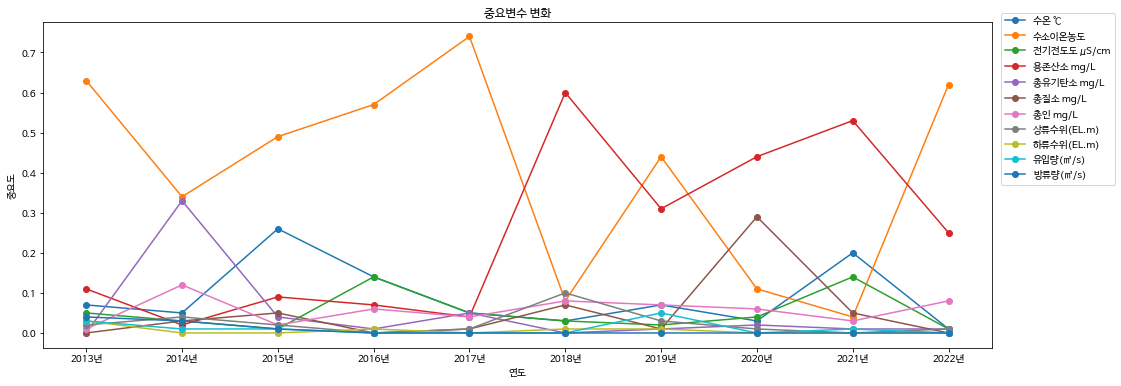

In [166]:
fig = plt.figure(figsize=(17, 6))

for col in feature_importance_df.columns:
    plt.plot(feature_importance_df.index, feature_importance_df[col], marker = 'o')

plt.title('중요변수 변화')
plt.xlabel('연도')
plt.ylabel('중요도')
plt.legend(feature_importance_df.columns, loc = [1.01, 0.5])
plt.show()

2017년 전에는 수소이온농도가, 2018년부터는 용존산소가 중요함. 중간에 유기탄소, 수온, 총질소가 중요변수로 등장하는 것이 보임

# 에이다부스트 모델

In [177]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

In [178]:
for year in list(scb_yearly_w_all.keys())[1:]:
    print(year)

    X_train, X_test, y_train, y_test = train_test_split(scb_yearly_w_all[year].loc[:, cols], scb_yearly_w_all[year]['클로로필-a mg/㎥'], random_state=42)
    regr = AdaBoostRegressor(RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42, oob_score=True), random_state=42, n_estimators=100)    
    regr.fit(X_train, y_train)
    
    for score, name in zip(regr.feature_importances_, cols):
        print(round(score, 2), name)
    print(year, 'score :', regr.score(X_test, y_test))
    print('='*100)

2013년
0.04 수온 ℃
0.14 수소이온농도
0.1 전기전도도 μS/cm
0.4 용존산소 mg/L
0.04 총유기탄소 mg/L
0.04 총질소 mg/L
0.04 총인 mg/L
0.02 상류수위(EL.m)
0.08 하류수위(EL.m)
0.04 유입량(㎥/s)
0.07 방류량(㎥/s)
2013년 score : 0.6896319830760766
2014년
0.24 수온 ℃
0.07 수소이온농도
0.06 전기전도도 μS/cm
0.11 용존산소 mg/L
0.19 총유기탄소 mg/L
0.05 총질소 mg/L
0.13 총인 mg/L
0.04 상류수위(EL.m)
0.02 하류수위(EL.m)
0.04 유입량(㎥/s)
0.05 방류량(㎥/s)
2014년 score : 0.8531139819198541
2015년
0.18 수온 ℃
0.23 수소이온농도
0.05 전기전도도 μS/cm
0.26 용존산소 mg/L
0.1 총유기탄소 mg/L
0.06 총질소 mg/L
0.05 총인 mg/L
0.03 상류수위(EL.m)
0.03 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2015년 score : 0.7944306723423505
2016년
0.19 수온 ℃
0.32 수소이온농도
0.1 전기전도도 μS/cm
0.21 용존산소 mg/L
0.03 총유기탄소 mg/L
0.03 총질소 mg/L
0.04 총인 mg/L
0.02 상류수위(EL.m)
0.04 하류수위(EL.m)
0.02 유입량(㎥/s)
0.01 방류량(㎥/s)
2016년 score : 0.7809205464802086
2017년
0.12 수온 ℃
0.28 수소이온농도
0.12 전기전도도 μS/cm
0.17 용존산소 mg/L
0.07 총유기탄소 mg/L
0.08 총질소 mg/L
0.08 총인 mg/L
0.02 상류수위(EL.m)
0.01 하류수위(EL.m)
0.03 유입량(㎥/s)
0.03 방류량(㎥/s)
2017년 score : 0.8176435798210443
2018년
0.07 수온 ℃
0.08 수소이

## 그레디언트 부스팅

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [31]:
cols = ['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L',
    '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)']

In [33]:
for year in list(scb_yearly_w_all.keys())[1:]:
    print(year)

    X_train, X_test, y_train, y_test = train_test_split(scb_yearly_w_all[year].loc[:, cols], scb_yearly_w_all[year]['클로로필-a mg/㎥'], random_state=42)
    reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.05, random_state=42)    
    reg.fit(X_train, y_train)
    
    for score, name in zip(reg.feature_importances_, cols):
        print(round(score, 2), name)
        feature_importance_df.loc[year, name] = round(score, 2)   
    #print(year, 'train_score :', reg.train_score_)
    print(year, 'score :', reg.score(X_test, y_test))
    print('='*100)

2013년
0.08 수온 ℃
0.48 수소이온농도
0.07 전기전도도 μS/cm
0.12 용존산소 mg/L
0.02 총유기탄소 mg/L
0.03 총질소 mg/L
0.05 총인 mg/L
0.02 상류수위(EL.m)
0.06 하류수위(EL.m)
0.01 유입량(㎥/s)
0.06 방류량(㎥/s)
2013년 score : 0.8842580668682258
2014년
0.09 수온 ℃
0.26 수소이온농도
0.05 전기전도도 μS/cm
0.04 용존산소 mg/L
0.26 총유기탄소 mg/L
0.05 총질소 mg/L
0.12 총인 mg/L
0.04 상류수위(EL.m)
0.02 하류수위(EL.m)
0.02 유입량(㎥/s)
0.04 방류량(㎥/s)
2014년 score : 0.9579395536342935
2015년
0.25 수온 ℃
0.39 수소이온농도
0.05 전기전도도 μS/cm
0.1 용존산소 mg/L
0.07 총유기탄소 mg/L
0.05 총질소 mg/L
0.04 총인 mg/L
0.02 상류수위(EL.m)
0.03 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2015년 score : 0.9635096650625076
2016년
0.17 수온 ℃
0.42 수소이온농도
0.13 전기전도도 μS/cm
0.1 용존산소 mg/L
0.04 총유기탄소 mg/L
0.03 총질소 mg/L
0.05 총인 mg/L
0.02 상류수위(EL.m)
0.03 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2016년 score : 0.9329220464674023
2017년
0.08 수온 ℃
0.48 수소이온농도
0.08 전기전도도 μS/cm
0.15 용존산소 mg/L
0.06 총유기탄소 mg/L
0.04 총질소 mg/L
0.06 총인 mg/L
0.02 상류수위(EL.m)
0.01 하류수위(EL.m)
0.01 유입량(㎥/s)
0.01 방류량(㎥/s)
2017년 score : 0.9440863405620983
2018년
0.05 수온 ℃
0.08 수

In [34]:
cols6 = ['수온 ℃', '전기전도도 μS/cm',
    '총유기탄소 mg/L', '총질소 mg/L', '총인 mg/L', '상류수위(EL.m)', '하류수위(EL.m)', '유입량(㎥/s)', '방류량(㎥/s)']

In [35]:
for year in list(scb_yearly_w_all.keys())[1:]:
    print(year)

    X_train, X_test, y_train, y_test = train_test_split(scb_yearly_w_all[year].loc[:, cols6], scb_yearly_w_all[year]['클로로필-a mg/㎥'], random_state=42)
    reg = GradientBoostingRegressor(max_depth=5, n_estimators=500, learning_rate=0.05, random_state=42)    
    reg.fit(X_train, y_train)
    
    for score, name in zip(reg.feature_importances_, cols6):
        print(round(score, 2), name)
        feature_importance_df.loc[year, name] = round(score, 2)   
    #print(year, 'train_score :', reg.train_score_)
    print(year, 'score :', reg.score(X_test, y_test))
    print('='*100)

2013년
0.35 수온 ℃
0.18 전기전도도 μS/cm
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.11 총인 mg/L
0.08 상류수위(EL.m)
0.05 하류수위(EL.m)
0.06 유입량(㎥/s)
0.08 방류량(㎥/s)
2013년 score : 0.8497671246023524
2014년
0.32 수온 ℃
0.06 전기전도도 μS/cm
0.2 총유기탄소 mg/L
0.06 총질소 mg/L
0.14 총인 mg/L
0.05 상류수위(EL.m)
0.03 하류수위(EL.m)
0.06 유입량(㎥/s)
0.09 방류량(㎥/s)
2014년 score : 0.9452903924638429
2015년
0.31 수온 ℃
0.07 전기전도도 μS/cm
0.17 총유기탄소 mg/L
0.12 총질소 mg/L
0.04 총인 mg/L
0.13 상류수위(EL.m)
0.07 하류수위(EL.m)
0.06 유입량(㎥/s)
0.04 방류량(㎥/s)
2015년 score : 0.9140454630521548
2016년
0.31 수온 ℃
0.28 전기전도도 μS/cm
0.1 총유기탄소 mg/L
0.03 총질소 mg/L
0.05 총인 mg/L
0.03 상류수위(EL.m)
0.04 하류수위(EL.m)
0.09 유입량(㎥/s)
0.06 방류량(㎥/s)
2016년 score : 0.8890310877753366
2017년
0.18 수온 ℃
0.15 전기전도도 μS/cm
0.18 총유기탄소 mg/L
0.06 총질소 mg/L
0.18 총인 mg/L
0.04 상류수위(EL.m)
0.03 하류수위(EL.m)
0.07 유입량(㎥/s)
0.11 방류량(㎥/s)
2017년 score : 0.90696419751056
2018년
0.07 수온 ℃
0.48 전기전도도 μS/cm
0.02 총유기탄소 mg/L
0.11 총질소 mg/L
0.2 총인 mg/L
0.06 상류수위(EL.m)
0.02 하류수위(EL.m)
0.03 유입량(㎥/s)
0.02 방류량(㎥/s)
2018년 score : 0.94041896